In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
pip install matplotlib

In [98]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [67]:
data=pd.read_csv('/content/titanic_dataset.csv')

In [68]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [8]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [70]:
miss_cols=data[[  'Embarked','Cabin']]

In [71]:
miss_cols.isna().sum()

Embarked      2
Cabin       687
dtype: int64



##Handling missing Values



In [83]:
for i in ['Age']:
  data[i]=data[i].fillna(data[i].median())

In [84]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [76]:
from sklearn.impute import SimpleImputer

In [78]:
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [79]:
imputer=imputer.fit(miss_cols)

In [80]:
miss_cols=imputer.transform(miss_cols)

In [81]:
type(miss_cols)

numpy.ndarray

In [82]:
miss_cols=pd.DataFrame(miss_cols,columns=[  'Embarked','Cabin'])

In [85]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [52]:
type(miss_cols)

pandas.core.frame.DataFrame

In [59]:
data['Cabin'].mode()

0    B96 B98
1         G6
Name: Cabin, dtype: object

In [88]:
for i in ['Cabin']:
  data[i]=data[i].fillna('G6')

In [62]:
data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [86]:
for i in ['Embarked']:
  data[i]=data[i].fillna('S')

In [89]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

##Outlier Detection

In [90]:
data1=pd.DataFrame(data)

In [93]:
data1.set_index('PassengerId',inplace= True)

In [94]:
data1.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [95]:
data1.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [100]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


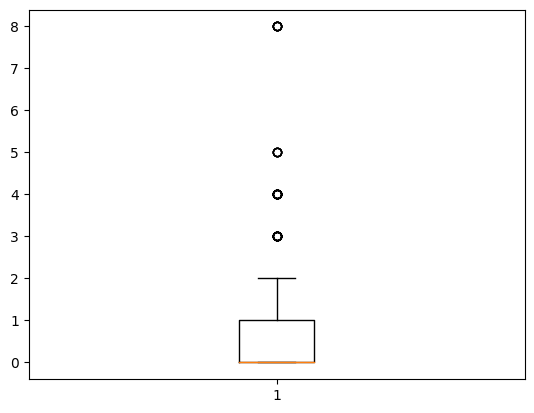

In [101]:
plt.boxplot(data1['SibSp'])
plt.show()

In [103]:
Q1=np.percentile(data1['SibSp'],25)

In [104]:
Q1

0.0

In [105]:
Q2=np.percentile(data1['SibSp'],50)

In [106]:
Q2

0.0

In [107]:
Q3=np.percentile(data1['SibSp'],75)

In [108]:
Q3

1.0

In [109]:
IQR=Q3-Q1

In [110]:
IQR

1.0

In [112]:
up=Q3+1.5*IQR

In [113]:
up

2.5

In [117]:
outlier=[]
for x in data1['SibSp']:
  if x>3:
    outlier.append(x)

In [118]:
outlier

[4,
 4,
 5,
 4,
 5,
 4,
 8,
 4,
 4,
 8,
 4,
 8,
 4,
 4,
 4,
 4,
 8,
 5,
 5,
 4,
 4,
 5,
 4,
 4,
 8,
 4,
 4,
 8,
 4,
 8]

In [119]:
ind=data1['SibSp']>up
data1.loc[ind].index

Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160, 165,
       172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 387,
       410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788, 793, 814, 820,
       825, 847, 851, 864],
      dtype='int64', name='PassengerId')

In [121]:
data1.shape

(891, 11)

In [122]:
data1.drop( [ 8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160, 165,
       172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 387,
       410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788, 793, 814, 820,
       825, 847, 851, 864],inplace=True)

In [123]:
data1.shape

(845, 11)

Second Column Outlier Detection

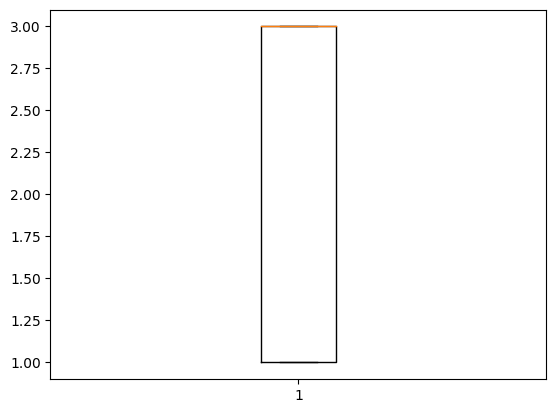

In [124]:
plt.boxplot(data1['Pclass'])
plt.show()

Here we dont have outliers
Now 3rd column

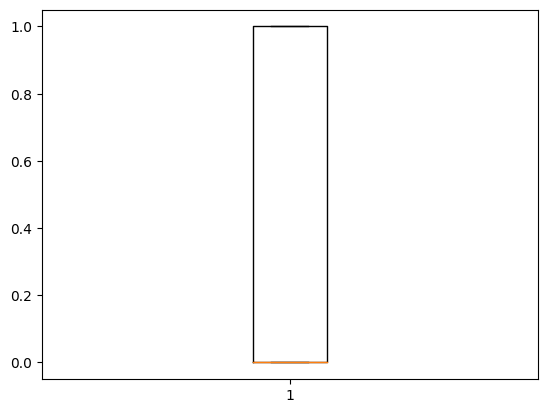

In [126]:
plt.boxplot(data1['Survived'])
plt.show()

##Min Max Scaling

In [157]:
data2=data.drop(['Name','Sex','Ticket','Cabin','Embarked','Age'],axis=1)

In [159]:
data2.set_index('PassengerId',inplace= True)

In [158]:
data2.head()

PassengerId  Survived  Pclass  SibSp  Parch     Fare
0            1         0       3      1      0   7.2500
1            2         1       1      1      0  71.2833
2            3         1       3      0      0   7.9250
3            4         1       1      1      0  53.1000
4            5         0       3      0      0   8.0500

In [160]:
data2.columns

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [161]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler=MinMaxScaler(feature_range=(0,1))
data2=minmax_scaler.fit_transform(data2)

In [163]:
type(data2)

numpy.ndarray

In [164]:
data2=pd.DataFrame(data2)

In [165]:
type(data2)

pandas.core.frame.DataFrame

In [166]:
data2.describe()

0           1           2           3           4
count  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    0.654321    0.065376    0.063599    0.062858
std      0.486592    0.418036    0.137843    0.134343    0.096995
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.500000    0.000000    0.000000    0.015440
50%      0.000000    1.000000    0.000000    0.000000    0.028213
75%      1.000000    1.000000    0.125000    0.000000    0.060508
max      1.000000    1.000000    1.000000    1.000000    1.000000

In [171]:
data1.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [173]:
data2.describe()

0           1           2           3           4
count  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    0.654321    0.065376    0.063599    0.062858
std      0.486592    0.418036    0.137843    0.134343    0.096995
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.500000    0.000000    0.000000    0.015440
50%      0.000000    1.000000    0.000000    0.000000    0.028213
75%      1.000000    1.000000    0.125000    0.000000    0.060508
max      1.000000    1.000000    1.000000    1.000000    1.000000

In [ ]:
data1=data1.drop(['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare'],axis=1)

In [187]:
data1=pd.concat([data1,data2],axis=1)


In [188]:
data1.head()

Name     Sex   Age  \
1                            Braund, Mr. Owen Harris    male  22.0   
2  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                             Heikkinen, Miss. Laina  female  26.0   
4       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                           Allen, Mr. William Henry    male  35.0   

             Ticket Cabin Embarked    0    1      2    3         4  
1         A/5 21171    G6        S  1.0  0.0  0.125  0.0  0.139136  
2          PC 17599   C85        C  1.0  1.0  0.000  0.0  0.015469  
3  STON/O2. 3101282    G6        S  1.0  0.0  0.125  0.0  0.103644  
4            113803  C123        S  0.0  1.0  0.000  0.0  0.015713  
5            373450    G6        S  0.0  1.0  0.000  0.0  0.016510

In [189]:
data1.columns=['Name','Sex','Age','Ticket','Cabin','Embarked','Survived', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [190]:
data1.head()

Name     Sex   Age  \
1                            Braund, Mr. Owen Harris    male  22.0   
2  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                             Heikkinen, Miss. Laina  female  26.0   
4       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                           Allen, Mr. William Henry    male  35.0   

             Ticket Cabin Embarked  Survived  Pclass  SibSp  Parch      Fare  
1         A/5 21171    G6        S       1.0     0.0  0.125    0.0  0.139136  
2          PC 17599   C85        C       1.0     1.0  0.000    0.0  0.015469  
3  STON/O2. 3101282    G6        S       1.0     0.0  0.125    0.0  0.103644  
4            113803  C123        S       0.0     1.0  0.000    0.0  0.015713  
5            373450    G6        S       0.0     1.0  0.000    0.0  0.016510